# ImmoEliza Project - Part 3: Regression 

# Step 3: Data Formatting

In [1]:
# Import cleaned & encoded data

import pandas as pd

df_selected = pd.read_csv("./data/2_engineered_data.csv")

## Hybrid Approach of Normalization and Standardization

* Latitude and longitude stay within a logical and interpretable range.
* Price_per_sqm gets standardized to mitigate the impact of extreme values.

**Warning!**
* For KNN modules the target is not normalized/standardized

***Normalization (Min-Max-Scaling)***

Normalization rescales the values of a feature into a fixed range (usually [0, 1] or [-1, 1]). It works best for features that have no inherent scale but are important in terms of their relative positions. Use normalization for features that:

* Are continuous with a specific range.
* Are not heavily skewed (i.e., the data should be roughly evenly distributed).
* You want to make comparable in magnitude across different features.


***Standardization (Z-score Scaling)***
Standardization transforms the data to have a mean of 0 and a standard deviation of 1. It’s useful when:

* The feature follows a Gaussian distribution (normal distribution).
* The feature contains outliers (as it’s less sensitive to them compared to normalization).
* The feature has an arbitrary scale, and you want to focus on its relative variance.

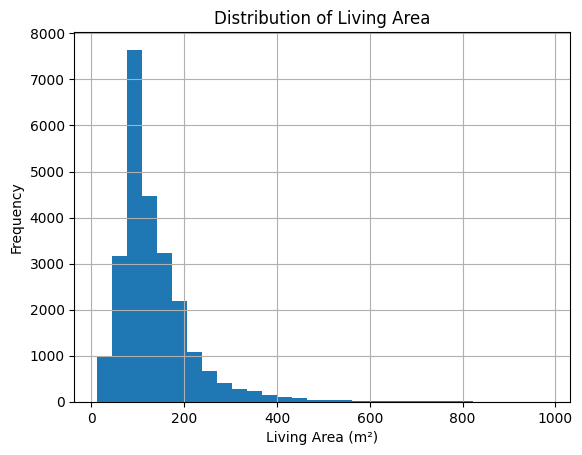

In [2]:
import matplotlib.pyplot as plt

df_selected['living_area'].hist(bins=30)  # You can adjust the number of bins if you want
plt.title('Distribution of Living Area')  # Title for the plot
plt.xlabel('Living Area (m²)')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()


Since living area is quite skewed, a good approach might be to apply log transformation (no.logip) to make the data more symmetrical and then standardization to ensure that the transformed values have a mean of 0 and a stdev of 1, allowing the feature to be on a comparable scale with others and reduces the impact of outliers and extreme values, allowing the model to perform better.

**Final Decision:**

* Normalize:

  * Latitude
  * Longitude

* Log Transform and standardize
  * Living Area

* Standardize:

  * Subtype of Property (after encoding)
  * Building Condition (after encoding)
  * Facade Number (if treated as numerical or ordinal)
  * Equipped kitchen
  * Garden
  * Terrace (since KNN is sensitive to feature scales)
  * Swimming Pool (same)

In [3]:
# Convert relevant columns to float for transformations
df_selected.loc[:, ['latitude', 'longitude']] = df_selected.loc[:, ['latitude', 'longitude']].astype(float)

# Convert categorical-like columns to numeric first (force to NaN if not convertible)
df_selected[['living_area', 'subtype_of_property', 'building_condition', 'equipped_kitchen', 'terrace', 'swimming_pool', 'facade_number', 'garden']] = \
    df_selected[['living_area', 'subtype_of_property', 'building_condition', 'equipped_kitchen', 'terrace', 'swimming_pool', 'facade_number', 'garden']].astype(float)


In [4]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24878 entries, 0 to 24877
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                24878 non-null  float64
 1   latitude             24878 non-null  float64
 2   longitude            24878 non-null  float64
 3   living_area          24878 non-null  float64
 4   garden               24878 non-null  float64
 5   subtype_of_property  24878 non-null  float64
 6   building_condition   24878 non-null  float64
 7   equipped_kitchen     24878 non-null  float64
 8   terrace              24878 non-null  float64
 9   swimming_pool        24878 non-null  float64
 10  facade_number        24878 non-null  float64
dtypes: float64(11)
memory usage: 2.1 MB


In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scalers
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Normalize (latitude, longitude)
df_selected.loc[:, ['latitude', 'longitude']] = scaler_minmax.fit_transform(df_selected.loc[:, ['latitude', 'longitude']])

# Standardize (subtype, building condition, binary features, facade number)
df_selected.loc[:, ['subtype_of_property', 'building_condition', 'equipped_kitchen', 'terrace', 'swimming_pool', 'facade_number', 'garden']] = scaler_standard.fit_transform(df_selected.loc[:, ['subtype_of_property', 'building_condition', 'equipped_kitchen', 'terrace', 'swimming_pool', 'facade_number', 'garden']])

# Step 1: Apply log transformation to living area
#df_selected.loc[:, 'living_area'] = np.log1p(df_selected['living_area'])  # log(1 + x) to avoid log(0)

# Step 2: Apply standardization to living area
scaler = StandardScaler()
df_selected.loc[:, 'living_area'] = scaler.fit_transform(df_selected[['living_area']])

# Apply log transformation to 'price'
#df_selected.loc[:, 'price'] = np.log1p(df_selected['price'])

# Ensure dtype compatibility (just to be safe)
df_selected = df_selected.astype({'living_area': float})

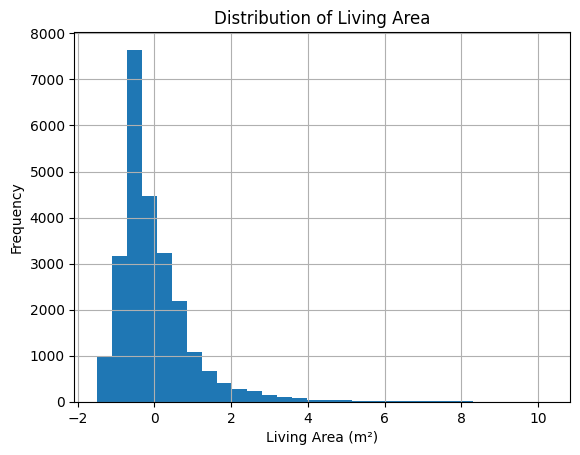

In [6]:
import matplotlib.pyplot as plt

df_selected['living_area'].hist(bins=30)  # You can adjust the number of bins if you want
plt.title('Distribution of Living Area')  # Title for the plot
plt.xlabel('Living Area (m²)')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()


In [7]:
# Export final dataframe
df_selected.to_csv('./data/3_formatted_data.csv', index=False)